In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
resolution = 1000
flank=50000

In [3]:
# clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/DMSO4h/DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/dTAG4h/DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

clr_0 = cooler.Cooler(f'../../DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
clr_1 = cooler.Cooler(f'../../DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_2 = cooler.Cooler(f'../../DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_3 = cooler.Cooler(f'../../DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_4 = cooler.Cooler(f'../../DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_5 = cooler.Cooler(f'../../DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_6 = cooler.Cooler(f'../../DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT_noheader.bedpe', schema='bedpe')
# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)


sites = bioframe.read_table('/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig4/pileup/R2/CTCF_loop.bedpe', schema='bedpe')

In [6]:
expected_0 = expected_cis(
    clr_0,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [7]:
pup_0 = coolpup.pileup(
    clr_0, 
    sites, 
    features_format='bedpe', 
    view_df=hg38_arms, 
#     local=True,
#     flip_negative_strand=True, 
    expected_df=expected_0,
#     nshifts=10,
    flank=flank, 
    mindist=5000, 
#     maxdist=600_000,
#     subset=2000, 
#     seed=1,
    min_diag=2, 
    nproc=8
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


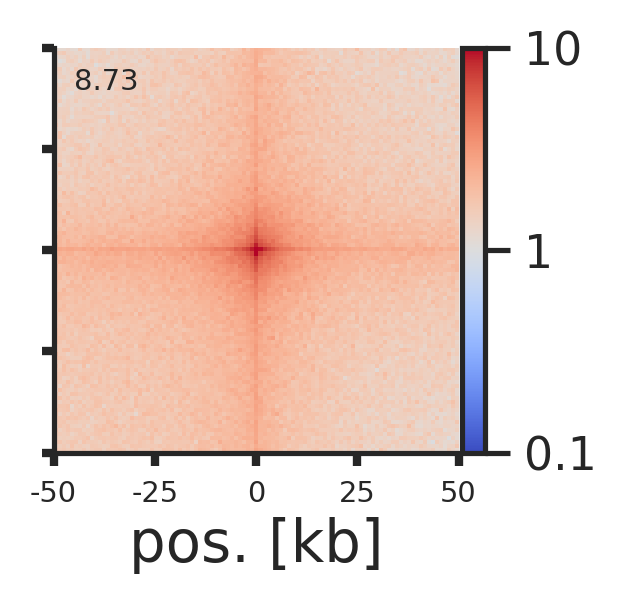

In [8]:
fig_0 = plotpup.plot(
    pup_0,
    score=True, 
    cmap='coolwarm', 
    scale='log',
    sym=True, 
    vmax=10,
    vmin=0.1,
    height=2, 
    plot_ticks=True
)

# fig_0.savefig('293T_WT.pdf')

In [9]:
expected_1 = expected_cis(
    clr_1,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [10]:
pup_1 = coolpup.pileup(
    clr_1, 
    sites, 
    features_format='bedpe', 
    view_df=hg38_arms, 
#     local=True,
#     flip_negative_strand=True, 
    expected_df=expected_1,
#     nshifts=10,
    flank=flank, 
    mindist=5000, 
#     maxdist=600_000,
#     subset=2000, 
#     seed=1,
    min_diag=2, 
    nproc=8
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


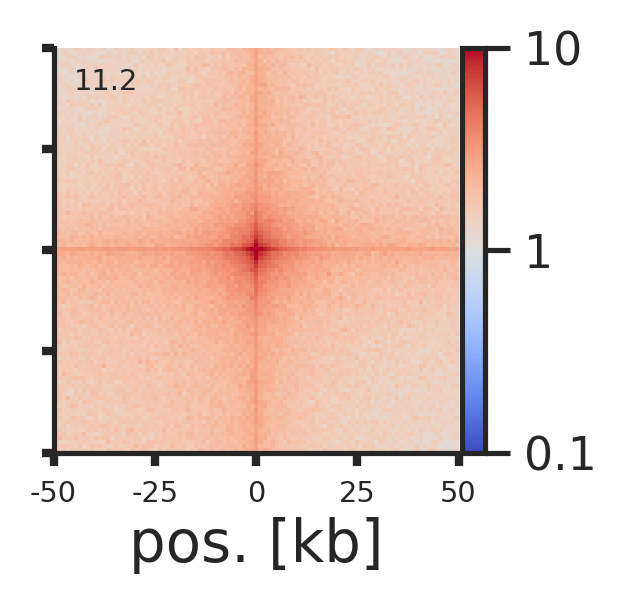

In [11]:
fig_1 = plotpup.plot(
    pup_1,
    score=True, 
    cmap='coolwarm', 
    scale='log',
    sym=True, 
    vmax=10,
    vmin=0.1,
    height=2, 
    plot_ticks=True
)

fig_1.savefig('R3D7_DMSO.pdf')

In [12]:
expected_2 = expected_cis(
    clr_2,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [13]:
pup_2 = coolpup.pileup(
    clr_2,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
    expected_df=expected_2,                      
#     nshifts=10,                      
    flank=flank,                      
    mindist=5000,
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                     
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr2_q', 'chr2_q'): 742
INFO:coolpuppy:('chr

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


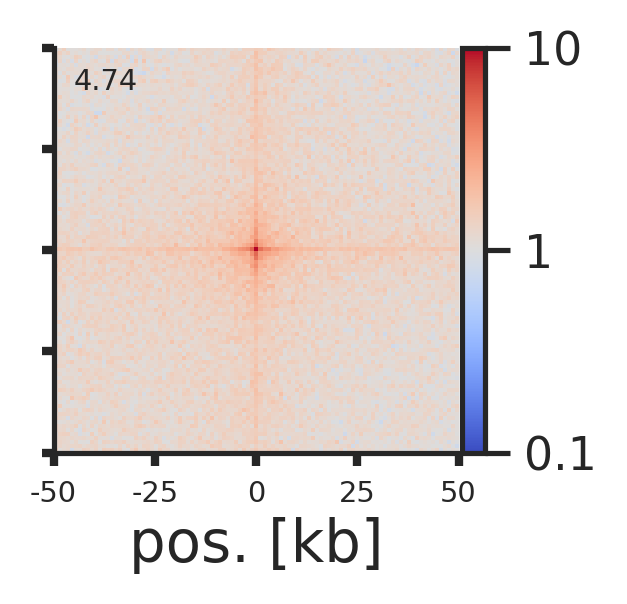

In [14]:
fig_2 = plotpup.plot(
    pup_2,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,
    vmax=10,
    vmin=0.1,            
    height=2,             
    plot_ticks=True
)

fig_2.savefig('R3D7_dTAG.pdf')

/home/lxk/.local/lib/python3.8/site-packages/coolpuppy/lib/puputils.py:151: UserWarning: Note that nproc is different between the two pileups
  warnings.warn(f"Note that {col} is different between the two pileups")
INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


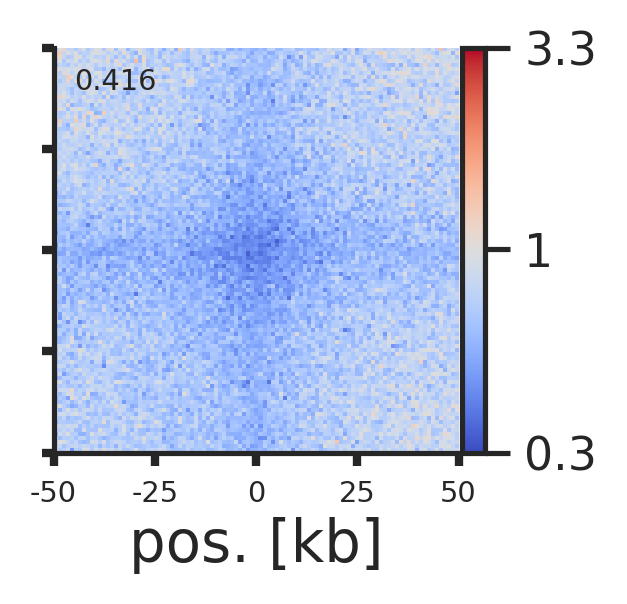

In [15]:
pup_divide_1 = divide_pups(pup_2, pup_1)

fig_divide_1 = plotpup.plot(
    pup_divide_1,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=3.3,             
    vmin=0.3,            
    height=2,             
    plot_ticks=True            
)

fig_divide_1.savefig('R3D7_dTAG-DMSO.pdf')

In [16]:
expected_3= expected_cis(
    clr_3,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [17]:
pup_3 = coolpup.pileup(
    clr_3,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
    expected_df=expected_3,                      
#     nshifts=10,                      
    flank=flank,                      
    mindist=5000, 
#     maxdist=600_000,
#     subset=2000, 
#     seed=1,                      
    min_diag=2,                      
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


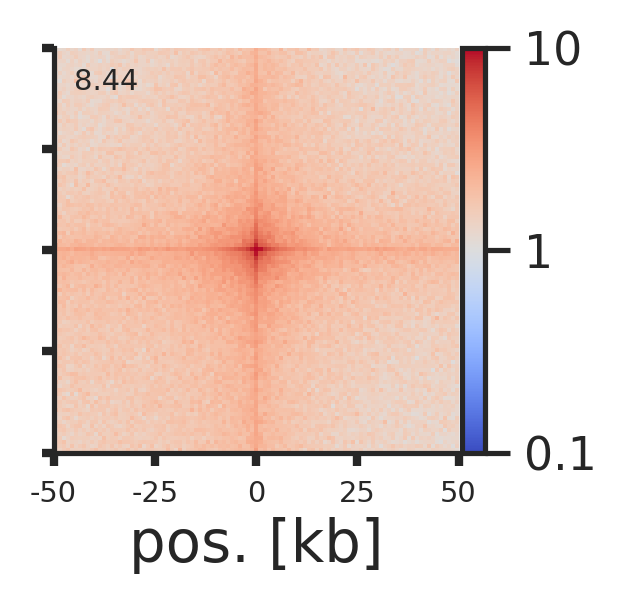

In [18]:
fig_3 = plotpup.plot(
    pup_3,            
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True, 
    vmax=10,
    vmin=0.1,            
    height=2,             
    plot_ticks=True
)

# fig_3.savefig('C2D5_DMSO.pdf')

In [19]:
expected_4 = expected_cis(
    clr_4,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [20]:
pup_4 = coolpup.pileup(
    clr_4,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
    expected_df=expected_4,                      
#     nshifts=10,                      
    flank=flank,                      
    mindist=5000,                      
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                      
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


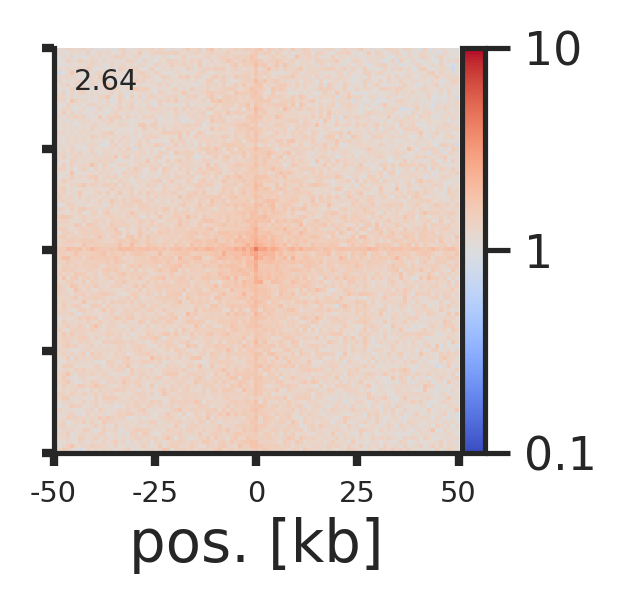

In [21]:
fig_4 = plotpup.plot(
    pup_4,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True, 
    vmax=10,
    vmin=0.1,            
    height=2,             
    plot_ticks=True
)

# fig_4.savefig('C2D5_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


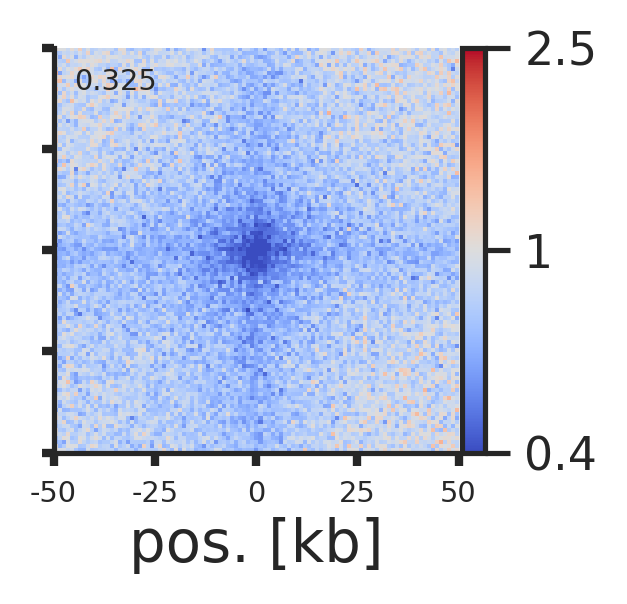

In [22]:
pup_divide_2 = divide_pups(pup_4, pup_3)

fig_divide_2 = plotpup.plot(
    pup_divide_2,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=2.5,             
    vmin=0.4,        
    height=2,             
    plot_ticks=True            
)

# fig_divide_2.savefig('C2D5_dTAG-DMSO.pdf')

In [23]:
expected_5 = expected_cis(
    clr_5,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [24]:
pup_5 = coolpup.pileup(
    clr_5,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
    expected_df=expected_5,                      
#     nshifts=10,                      
    flank=flank,                      
    mindist=5000,                       
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                     
    min_diag=2,                      
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


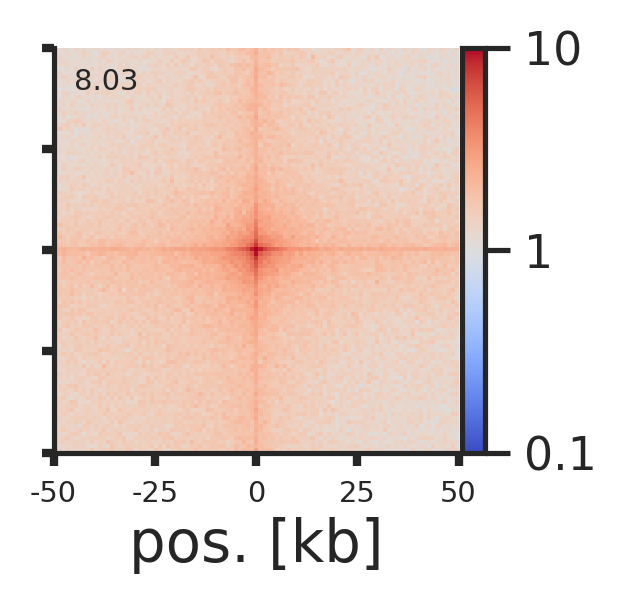

In [25]:
fig_5 = plotpup.plot(
    pup_5,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=10,
    vmin=0.1,           
    height=2,             
    plot_ticks=True
)

fig_5.savefig('RC1A3_DMSO.pdf')

In [26]:
expected_6 = expected_cis(
    clr_6,
    ignore_diags=2,
    view_df=hg38_arms,
    chunksize=1000000, 
    nproc=80
)

In [27]:
pup_6 = coolpup.pileup(
    clr_6,                       
    sites,                       
    features_format='bedpe',                       
    view_df=hg38_arms,                      
#     local=True,                      
#     flip_negative_strand=True,                      
    expected_df=expected_6,                      
#     nshifts=10,                      
    flank=flank,                      
    mindist=5000,                      
#     maxdist=600_000,                     
#     subset=2000,                     
#     seed=1,                      
    min_diag=2,                      
    nproc=80
)

INFO:coolpuppy:('chr10_p', 'chr10_p'): 178
INFO:coolpuppy:('chr1_p', 'chr1_p'): 702
INFO:coolpuppy:('chr11_p', 'chr11_p'): 229
INFO:coolpuppy:('chr1_q', 'chr1_q'): 636
INFO:coolpuppy:('chr10_q', 'chr10_q'): 581
INFO:coolpuppy:('chr12_p', 'chr12_p'): 207
INFO:coolpuppy:('chr11_q', 'chr11_q'): 477
INFO:coolpuppy:('chr12_q', 'chr12_q'): 532
INFO:coolpuppy:('chr13_q', 'chr13_q'): 418
INFO:coolpuppy:('chr14_q', 'chr14_q'): 465
INFO:coolpuppy:('chr16_p', 'chr16_p'): 125
INFO:coolpuppy:('chr15_q', 'chr15_q'): 391
INFO:coolpuppy:('chr16_q', 'chr16_q'): 239
INFO:coolpuppy:('chr17_p', 'chr17_p'): 141
INFO:coolpuppy:('chr18_p', 'chr18_p'): 68
INFO:coolpuppy:('chr17_q', 'chr17_q'): 385
INFO:coolpuppy:('chr19_p', 'chr19_p'): 169
INFO:coolpuppy:('chr18_q', 'chr18_q'): 245
INFO:coolpuppy:('chr19_q', 'chr19_q'): 161
INFO:coolpuppy:('chr20_p', 'chr20_p'): 163
INFO:coolpuppy:('chr2_p', 'chr2_p'): 400
INFO:coolpuppy:('chr20_q', 'chr20_q'): 221
INFO:coolpuppy:('chr21_q', 'chr21_q'): 159
INFO:coolpuppy:('c

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


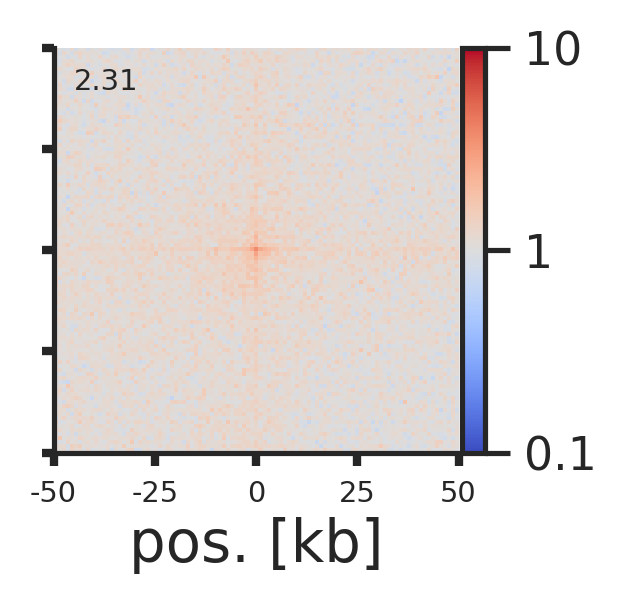

In [28]:
fig_6 = plotpup.plot(
    pup_6,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,              
    vmax=10,
    vmin=0.1,           
    height=2,             
    plot_ticks=True
)

fig_6.savefig('RC1A3_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


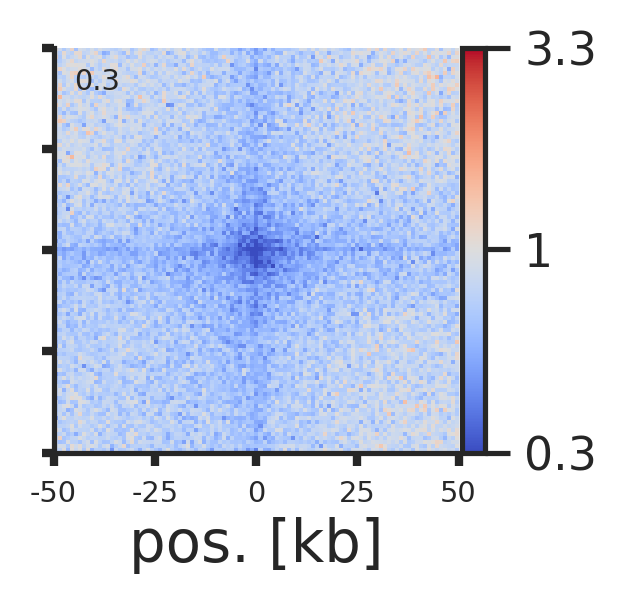

In [29]:
pup_divide_3 = divide_pups(pup_6, pup_5)

fig_divide_3 = plotpup.plot(
    pup_divide_3,             
    score=True,             
    cmap='coolwarm',             
    scale='log',             
    sym=True,             
    vmax=3.3,             
    vmin=0.3,             
    height=2,             
    plot_ticks=True            
)

fig_divide_3.savefig('RC1A3_dTAG-DMSO.pdf')

In [30]:
np.log2(0.4)

-1.3219280948873622